## Visualization of the timeseries data

### importing and preprocessing

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.concat(pd.read_excel("data/online_sales_dataset.xlsx", sheet_name=None), ignore_index=True)

In [3]:
df.shape

(1067371, 8)

In [4]:
def get_year(date):
    try:
        return date.year
    except Exception:
        return 'n/a'
    
def get_month(date):
    try:
        return date.month
    except Exception:
        return 'n/a'
    
def get_day(date):
    try:
        return date.day
    except Exception:
        return 'n/a'

# df["InvoiceYear"] = df["InvoiceDate"].apply(get_year)
# df["InvoiceMonth"] = df["InvoiceDate"].apply(get_month)
# df["InvoiceDay"] = df["InvoiceDate"].apply(get_day)

In [5]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
df = df.dropna()

df["totalPrice"] = df["Price"]*df["Quantity"]

df["StockCode"]=df["StockCode"].map(str)
df["Invoice"]=df["Invoice"].map(str)

# add column with day of the week (0 is monday)
df["InvoiceWeekday"] = df["InvoiceDate"].apply(lambda date: date.weekday() )

### product with most quantity sold

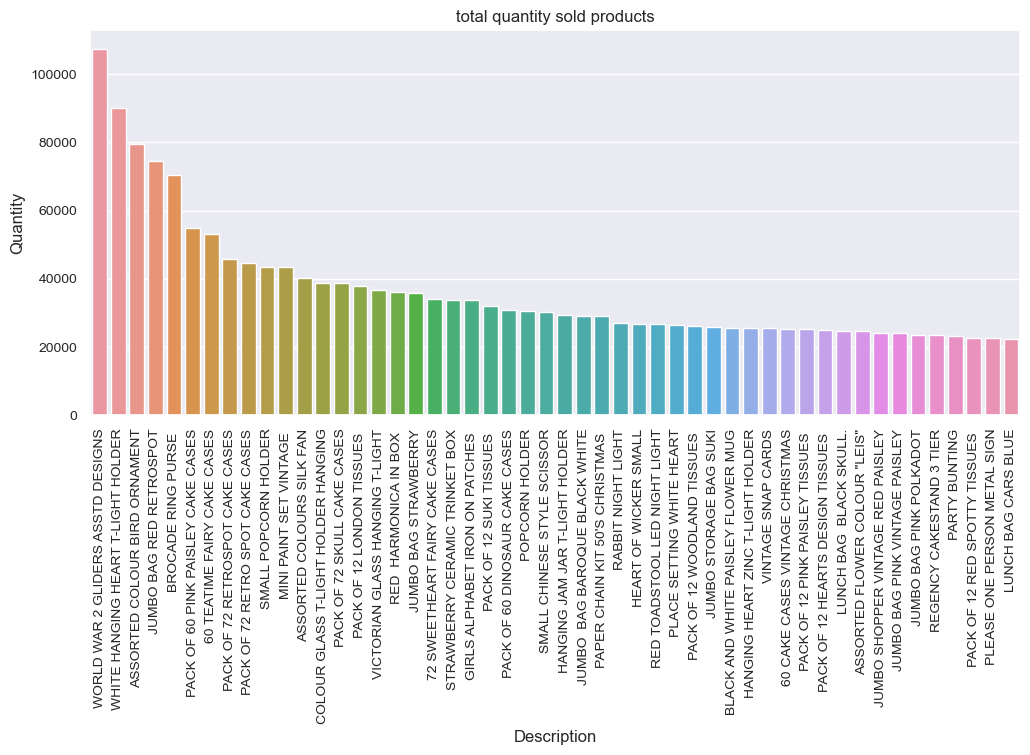

In [47]:
# total quantity sold for product

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,5)})

products_gb = pd.DataFrame(df.groupby(by=["Description"]).sum())
qt_sort_products_gb = products_gb.sort_values("Quantity", axis=0, ascending=False )
to_plot = qt_sort_products_gb.iloc[0:50]

plot = sns.barplot(data = to_plot, y="Quantity", x=to_plot.index)
plot.tick_params(labelsize=10)
plt.xticks(rotation = 90)
plt.title("top product by quantity sold")
plt.show()
plt.show()

### Product that made most earning

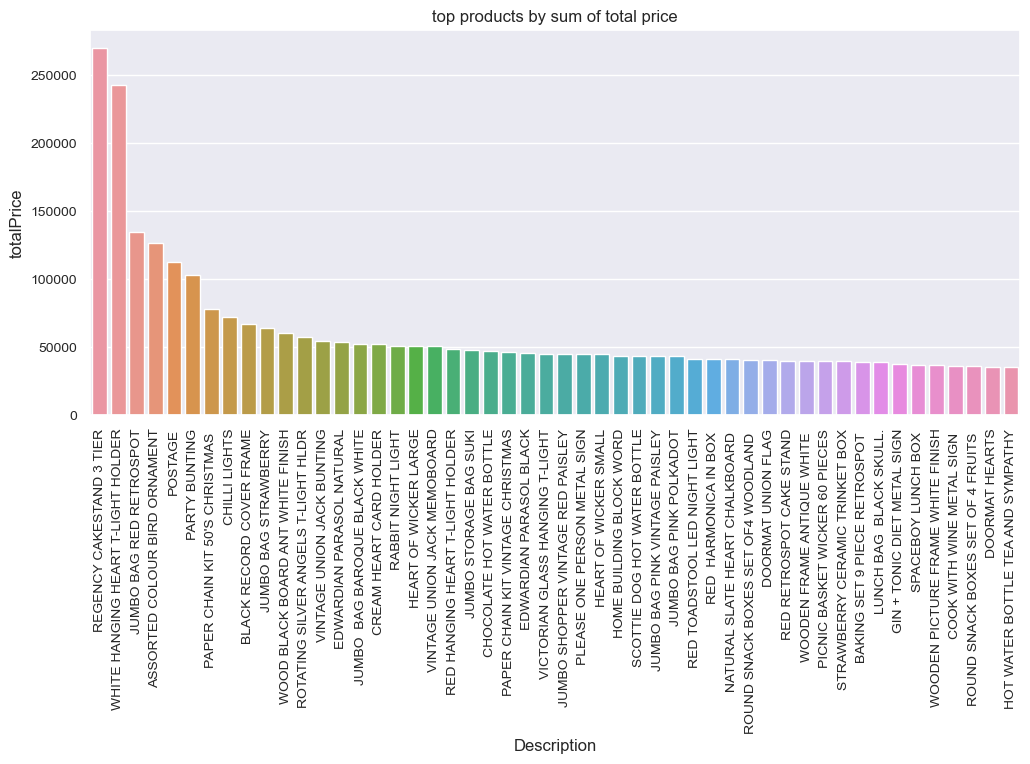

In [48]:
# total earnings for products
sns.set(rc={'figure.figsize':(12,5)})

p_sort_products_gb = products_gb.sort_values("totalPrice", axis=0, ascending=False )
to_plot = p_sort_products_gb.iloc[0:50]


plot = sns.barplot(data = to_plot, y="totalPrice", x=to_plot.index)
plot.tick_params(labelsize=10)
plt.xticks(rotation = 90)
plt.title("top products by sum of total price")
plt.show()

### Total earning by window time

In [29]:
df_2010_only = df[df["InvoiceDate"].dt.year == 2010]

#### Total earnings by hour

Text(0.5, 1.0, 'total earning by hour')

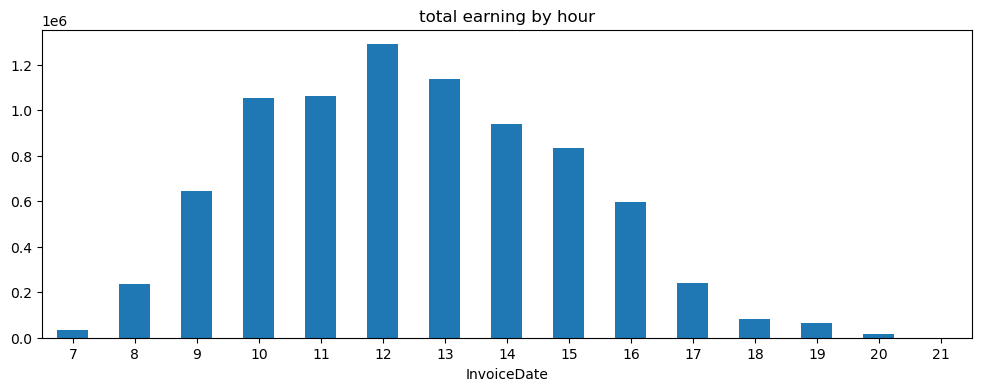

In [30]:


fig, axs = plt.subplots(figsize=(12, 4))

df_2010_only.groupby(df_2010_only["InvoiceDate"].dt.hour)["totalPrice"].sum().plot(kind='bar', rot=0, ax=axs)
plt.title("total earning by hour")

#### total earnings by day

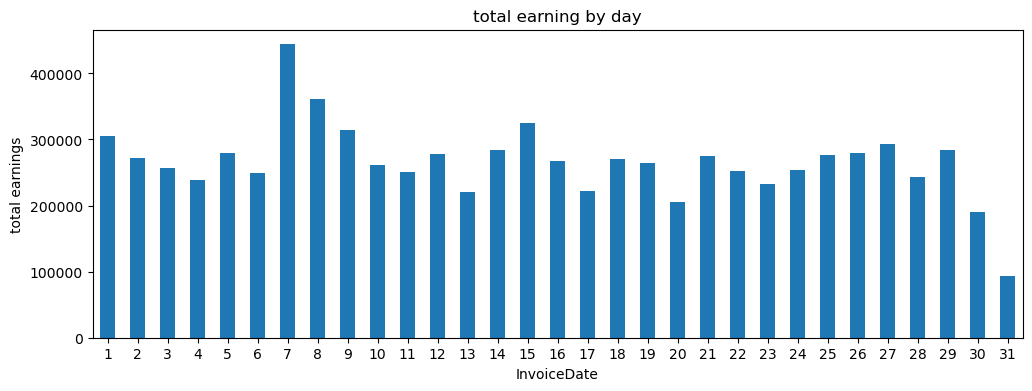

In [31]:
# total earnings by day

fig, axs = plt.subplots(figsize=(12, 4))

df_2010_only.groupby(df_2010_only["InvoiceDate"].dt.day)["totalPrice"].sum().plot(kind='bar', rot=0, ax=axs)
plt.title("total earning by day")
plt.ylabel("total earnings")
plt.show()

#### Total earnings by month

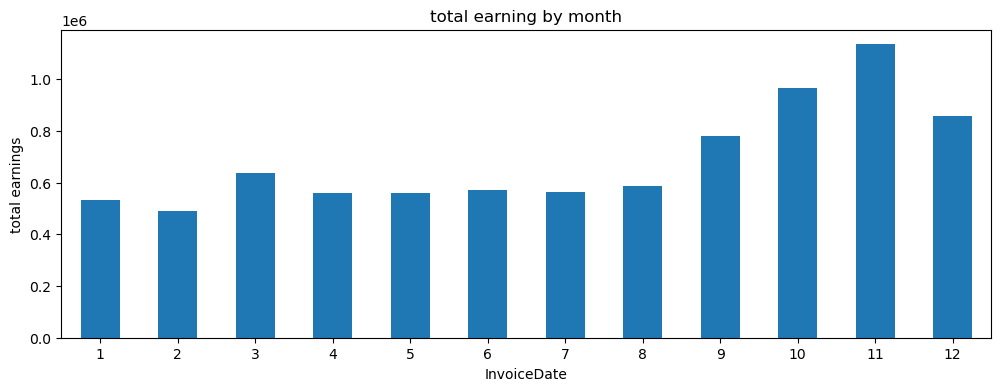

In [32]:
# total earnings by month

fig, axs = plt.subplots(figsize=(12, 4))

df_2010_only.groupby(df_2010_only["InvoiceDate"].dt.month)["totalPrice"].sum().plot(kind='bar', rot=0, ax=axs)
plt.title("total earning by month")
plt.ylabel("total earnings")
plt.show()

#### Total earnings by weekday

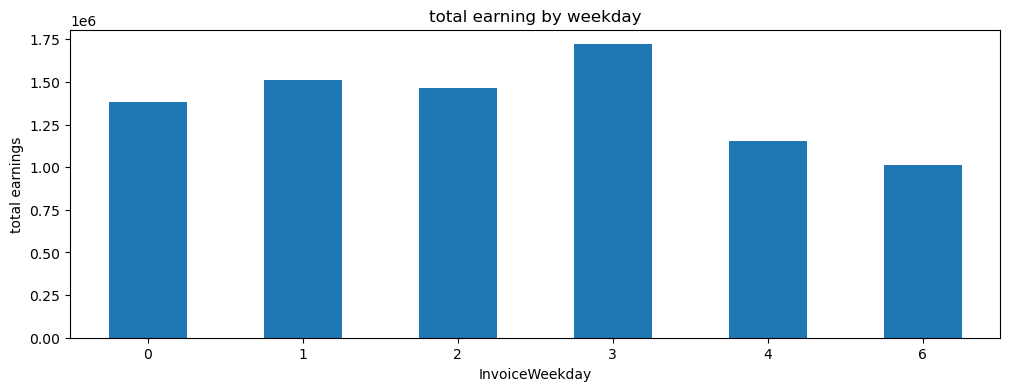

In [33]:
# total earnings by weekday (7 is sunday with no orders)

fig, axs = plt.subplots(figsize=(12, 4))

df_2010_only.groupby(df_2010_only["InvoiceWeekday"])["totalPrice"].sum().plot(kind='bar', rot=0, ax=axs)
plt.title("total earning by weekday")
plt.ylabel("total earnings")
plt.show()

### Revenue trend over the whole time

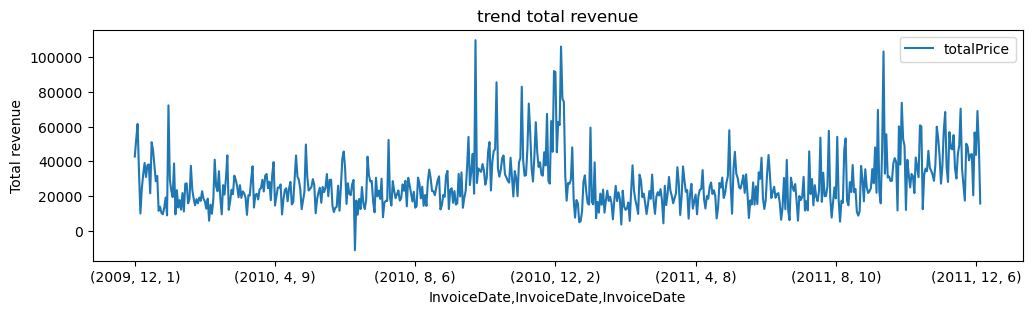

In [34]:
day_revenue_trend = df.groupby(by=[df["InvoiceDate"].dt.year, df["InvoiceDate"].dt.month, df["InvoiceDate"].dt.day], dropna=False).sum()
day_revenue_trend.plot(y="totalPrice", use_index=True, figsize=(12,3))
plt.title("trend total revenue")
plt.ylabel("Total revenue")
plt.show()

#### revenue trend smoothed with 14 days running average

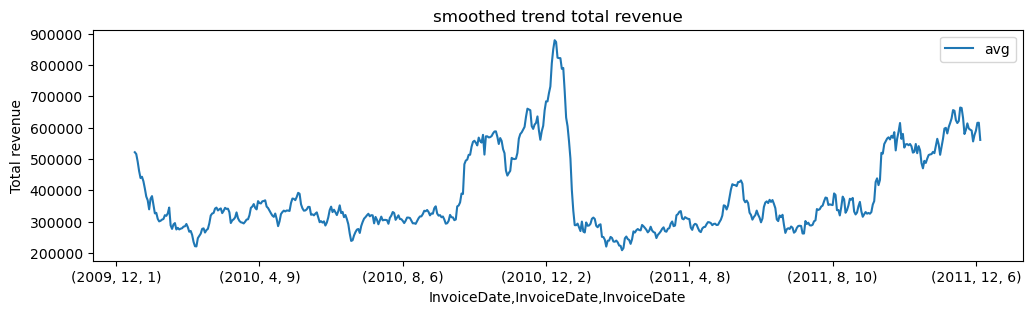

In [35]:
day_revenue_trend["avg"] = day_revenue_trend["totalPrice"].rolling(14).sum()

day_revenue_trend.plot(y="avg", use_index=True, figsize=(12,3))
plt.title("smoothed trend total revenue")
plt.ylabel("Total revenue")
plt.show()